In [1]:
import numpy as np
from matplotlib import *
from qiskit import *

In [2]:
# La porte du trésor E01

In [3]:
# Partie 1

In [4]:
# Soit 3 circuit
# q0 pour le gardien de gauche, 
# q1 pour le gardien de droite
# et q2 pour la ligne du mensonge
possibilitiesR = QuantumRegister(3)

# Créons un registre classique pour y mesure nos réponses
measureR = ClassicalRegister(1)

# Créons le circuit
circ = QuantumCircuit(possibilitiesR, measureR)

In [5]:
# Affichons le cicruit

In [6]:
circ.draw()

q0_0: 
      
q0_1: 
      
q0_2: 
      
c0: 1/

In [7]:
# Mettons le qubit q0 en état de superposition avec la porte Hadamard
# h = porte de Hadamard = superposition d'un qubit

In [8]:
circ.h(0)

In [9]:
circ.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
q0_2: ─────
           
c0: 1/═════

In [10]:
# Intriquons  qubits de q0 à q1 pour s'assurer que les deux gardiens savent la même chose
circ.cx(0,1)

In [11]:
circ.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
q0_2: ──────────
                
c0: 1/══════════

In [12]:
# Pour représenter la question:
# Quelle porte l'autre gardien me dirai de ne pas prendre ?
circ.h(2)

In [13]:
circ.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
      ┌───┐└───┘
q0_2: ┤ H ├─────
      └───┘     
c0: 1/══════════

In [14]:
# Partie 2
circ.barrier(0, 1, 2)

In [15]:
# Si la ligne du mensonge est dans l'état 1, c'est le gardien de gauche qui ment et on inverse sa réponse
circ.cx(2, 1)
circ.x(2)
# Si le gardien de droite ment, on inverse la réponse du gardien de droite
circ.cx(2, 0)
circ.x(2)

In [16]:
circ.draw()

┌───┐      ░           ┌───┐     
q0_0: ┤ H ├──■───░───────────┤ X ├─────
      └───┘┌─┴─┐ ░ ┌───┐     └─┬─┘     
q0_1: ─────┤ X ├─░─┤ X ├───────┼───────
      ┌───┐└───┘ ░ └─┬─┘┌───┐  │  ┌───┐
q0_2: ┤ H ├──────░───■──┤ X ├──■──┤ X ├
      └───┘      ░      └───┘     └───┘
c0: 1/═════════════════════════════════

In [17]:
# Partie 3
circ.barrier(0, 1, 2)

In [18]:
# Pour représenter, que me dirait le gardien si ?
# Applicons la porte swap
circ.swap(0, 1)

In [19]:
circ.draw()

┌───┐      ░           ┌───┐      ░    
q0_0: ┤ H ├──■───░───────────┤ X ├──────░──X─
      └───┘┌─┴─┐ ░ ┌───┐     └─┬─┘      ░  │ 
q0_1: ─────┤ X ├─░─┤ X ├───────┼────────░──X─
      ┌───┐└───┘ ░ └─┬─┘┌───┐  │  ┌───┐ ░    
q0_2: ┤ H ├──────░───■──┤ X ├──■──┤ X ├─░────
      └───┘      ░      └───┘     └───┘ ░    
c0: 1/═══════════════════════════════════════

In [20]:
# Comme nous demandons de ne pas prendre
# Ajoutons une porte not sur q0 et q1
circ.x(0)
circ.x(1)

In [21]:
circ.draw()

┌───┐      ░           ┌───┐      ░    ┌───┐
q0_0: ┤ H ├──■───░───────────┤ X ├──────░──X─┤ X ├
      └───┘┌─┴─┐ ░ ┌───┐     └─┬─┘      ░  │ ├───┤
q0_1: ─────┤ X ├─░─┤ X ├───────┼────────░──X─┤ X ├
      ┌───┐└───┘ ░ └─┬─┘┌───┐  │  ┌───┐ ░    └───┘
q0_2: ┤ H ├──────░───■──┤ X ├──■──┤ X ├─░─────────
      └───┘      ░      └───┘     └───┘ ░         
c0: 1/════════════════════════════════════════════

In [22]:
# Finalement, n'oublions pas que l'un des gardien ment sur la réponse de l'autre gardien
# On doit donc réapplique le circuit du mensonge que de la partie 2 du code

# Donc ->
# Si la ligne du mensonge est dans l'état 1, c'est le gardien de gauche qui ment et on inverse sa réponse
circ.cx(2, 1)
circ.x(2)
# Si le gardien de droite ment, on inverse la réponse du gardien de droite
circ.cx(2, 0)
circ.x(2)

In [23]:
circ.draw()

┌───┐      ░           ┌───┐      ░    ┌───┐          ┌───┐     
q0_0: ┤ H ├──■───░───────────┤ X ├──────░──X─┤ X ├──────────┤ X ├─────
      └───┘┌─┴─┐ ░ ┌───┐     └─┬─┘      ░  │ ├───┤┌───┐     └─┬─┘     
q0_1: ─────┤ X ├─░─┤ X ├───────┼────────░──X─┤ X ├┤ X ├───────┼───────
      ┌───┐└───┘ ░ └─┬─┘┌───┐  │  ┌───┐ ░    └───┘└─┬─┘┌───┐  │  ┌───┐
q0_2: ┤ H ├──────░───■──┤ X ├──■──┤ X ├─░───────────■──┤ X ├──■──┤ X ├
      └───┘      ░      └───┘     └───┘ ░              └───┘     └───┘
c0: 1/════════════════════════════════════════════════════════════════

In [24]:
# Pour avoir notre réponse, il ne nous reste que de poser la question à l'un des deux gardien
# Donc mesure l'état de q0 ou q1.
circ.measure(0,0)

# Et on mesure l'état de l'autre pour confirmer
circ.measure(1,0)

# Pour connaitre le gardien qui ment, on mesure le qubit q2
circ.measure(2,0)

In [25]:
circ.draw()

┌───┐      ░           ┌───┐      ░    ┌───┐          ┌───┐     ┌─┐      
q0_0: ┤ H ├──■───░───────────┤ X ├──────░──X─┤ X ├──────────┤ X ├─────┤M├──────
      └───┘┌─┴─┐ ░ ┌───┐     └─┬─┘      ░  │ ├───┤┌───┐     └─┬─┘     └╥┘┌─┐   
q0_1: ─────┤ X ├─░─┤ X ├───────┼────────░──X─┤ X ├┤ X ├───────┼────────╫─┤M├───
      ┌───┐└───┘ ░ └─┬─┘┌───┐  │  ┌───┐ ░    └───┘└─┬─┘┌───┐  │  ┌───┐ ║ └╥┘┌─┐
q0_2: ┤ H ├──────░───■──┤ X ├──■──┤ X ├─░───────────■──┤ X ├──■──┤ X ├─╫──╫─┤M├
      └───┘      ░      └───┘     └───┘ ░              └───┘     └───┘ ║  ║ └╥┘
c0: 1/═════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                       0  0  0

In [26]:
from qiskit import Aer

In [27]:
# On crée notre moteur de calcul
backend = Aer.get_backend('statevector_simulator')
# On lance le calcul quantique
job = backend.run(circ)
# Affichons le résultat
result = job.result()
# On a simplement des vecteurs d'état
outputstate = result.get_statevector(circ,decimals=3)

print(outputstate)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             1.+0.j],
            dims=(2, 2, 2))


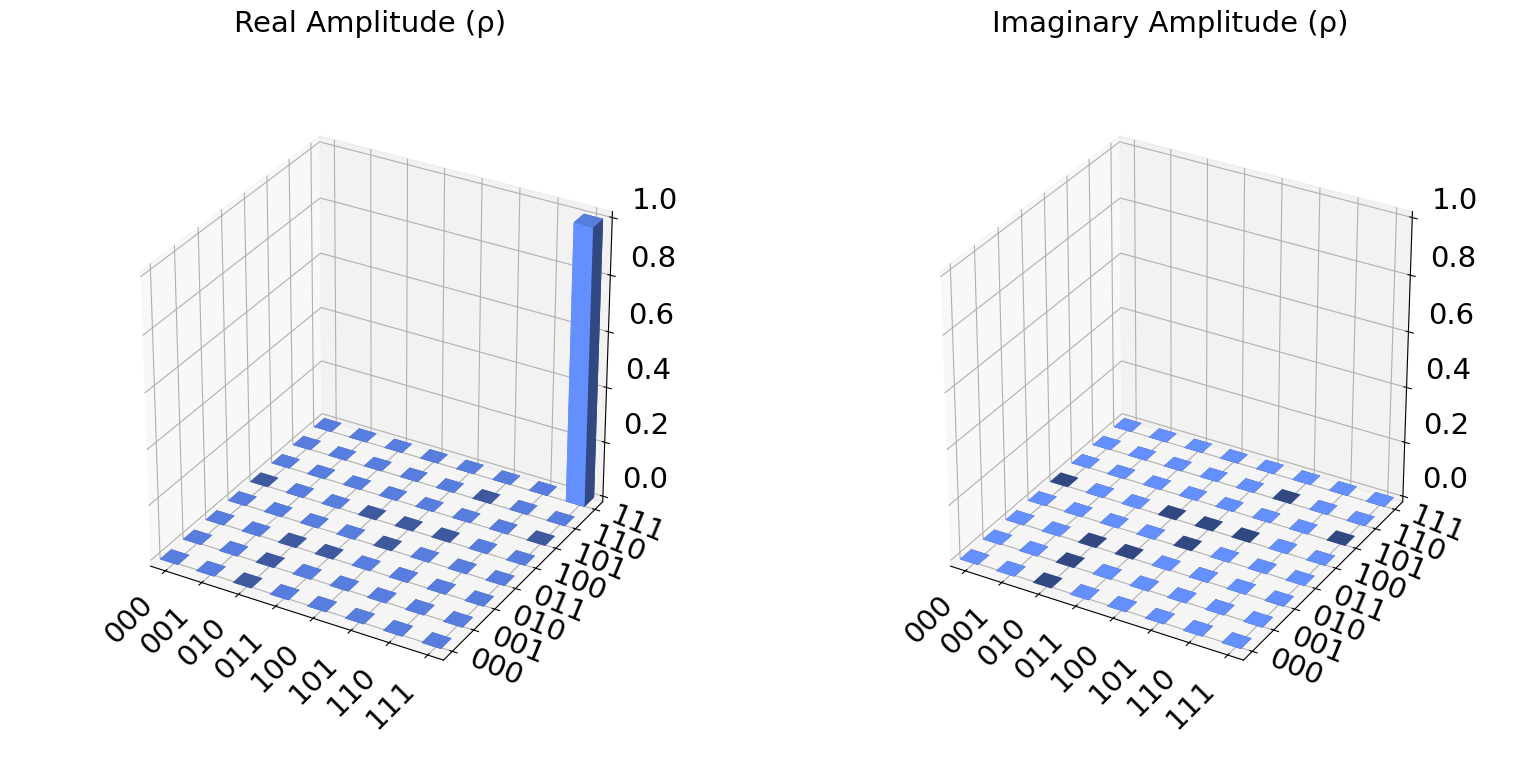

In [28]:
# Affichons un histogramme
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)